# Chicago Taxi Trips

# Introduction
- The data was extracted from Chicago Data Portal
- Main dataset contains total of 113 Million records
- The data set used for analysis is from April - July 2017

# Data Description 

### Taxi Trip Data
| Column Name | Description | Type |
| :------ |:------ | :------ |
| Trip ID | A unique identifier for the trip. | Plain Text |
| Taxi ID | A unique identifier for the taxi. | Plain Text |
| Trip Start Timestamp | When the trip started, rounded to the nearest 15 minutes. | Date & Time |
| Trip End Timestamp | When the trip ended, rounded to the nearest 15 minutes. | Date & Time |
| Trip Seconds | Time of the trip in seconds. | Number |
| Trip Miles | Distance of the trip in miles. | Number |
| Pickup Census Tract | The Census Tract where the trip began. For privacy, this Census Tract is not shown for some trips. | Plain Text |
| Dropoff Census Tract | The Census Tract where the trip ended. For privacy, this Census Tract is not shown for some trips. | Plain Text |
| Pickup Community Area | The Community Area where the trip began. | Number |
| Dropoff Community Area | The Community Area where the trip ended. | Number |
| Fare | The fare for the trip. | Money |
| Tips | The tip for the trip. Cash tips generally will not be recorded. | Money |
| Tolls | The tolls for the trip. | Money |
| Extras | Extra charges for the trip. | Money |
| Trip Total | Total cost of the trip, the total of the previous columns. | Money |
| Payment Type | Type of payment for the trip. | Plain Text |
| Company | The taxi company. | Plain Text |
| Pickup Centroid Latitude | The latitude of the center of the pickup census tract or the community area if the census tract has been hidden for privacy. | Number |
| Pickup Centroid Longitude | The longitude of the center of the pickup census tract or the community area if the census tract has been hidden for privacy. | Number |
| Dropoff Centroid Latitude | The latitude of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy. | Number |
| Dropoff Centroid Longitude | The longitude of the center of the dropoff census tract or the community area if the census tract has been hidden for privacy. | Number |

### Community Area
| Column Name | Description |
|:----|:----|
| Community Area | Number |
| Community Name | Text |

# Data Cleansing
### Following columns were dropped from dataset
-  Trip ID
-  Pickup Census Tract
-  Dropoff Census Tract
-  Pickup Centroid Location
-  Dropoff Centroid Location

### Records deletion

| Field | Deletion condition |
|------|------|
| Trip Miles | 0 and >= 50 |
| Trip Seconds | 0 and >= 3600 |
| Pickup Community Area | 0 or NULL |
| Dropoff Community Area | 0 or NULL |
| Fare | 0 |
| Pickup Centroid Latitude | NULL |
| Pickup Centroid Longitude | NULL |
| Dropoff Centroid Latitude | NULL |
| Dropoff Centroid Longitude | NULL |
|

### Post data cleansing the final data set consist of 1.5 million records

# Derived Tables

The data was grouped according to pickup community area and dropoff community area each seperately and the latitude and longitude. This would give us approximate centroid of the each community area.
#### Community area Location mapping table sample
| Community Area | Latitude | Longitude |
| ------ | ------ | ------ |
| 1 | 42.009506 | -87.670208 |
| 2 | 42.001556 | -87.695008 |
| 3 | 41.965685 | -87.655717 |
| 4 | 41.975091 | -87.687479 |
| 5 | 41.94784 | -87.683792 |



In [112]:
#Importing packages
import pandas as pd
import pymysql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import folium
from folium import plugins
from folium.features import DivIcon
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
import plotly.plotly as py
import plotly.graph_objs as go
col=['black','red','purple','blue','green']
from IPython.display import HTML

In [116]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
#Function to display multiple data frame in single output
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [4]:
#DB Connection
db = pymysql.connect(host='localhost', port=3306, user='root', passwd='MyNewPass', db='chicagotaxidb')

In [5]:
#Query Executer
def getRes(query):
    df = pd.read_sql(query, con=db)
    return df

# Distribution of Taxi ownership by each company


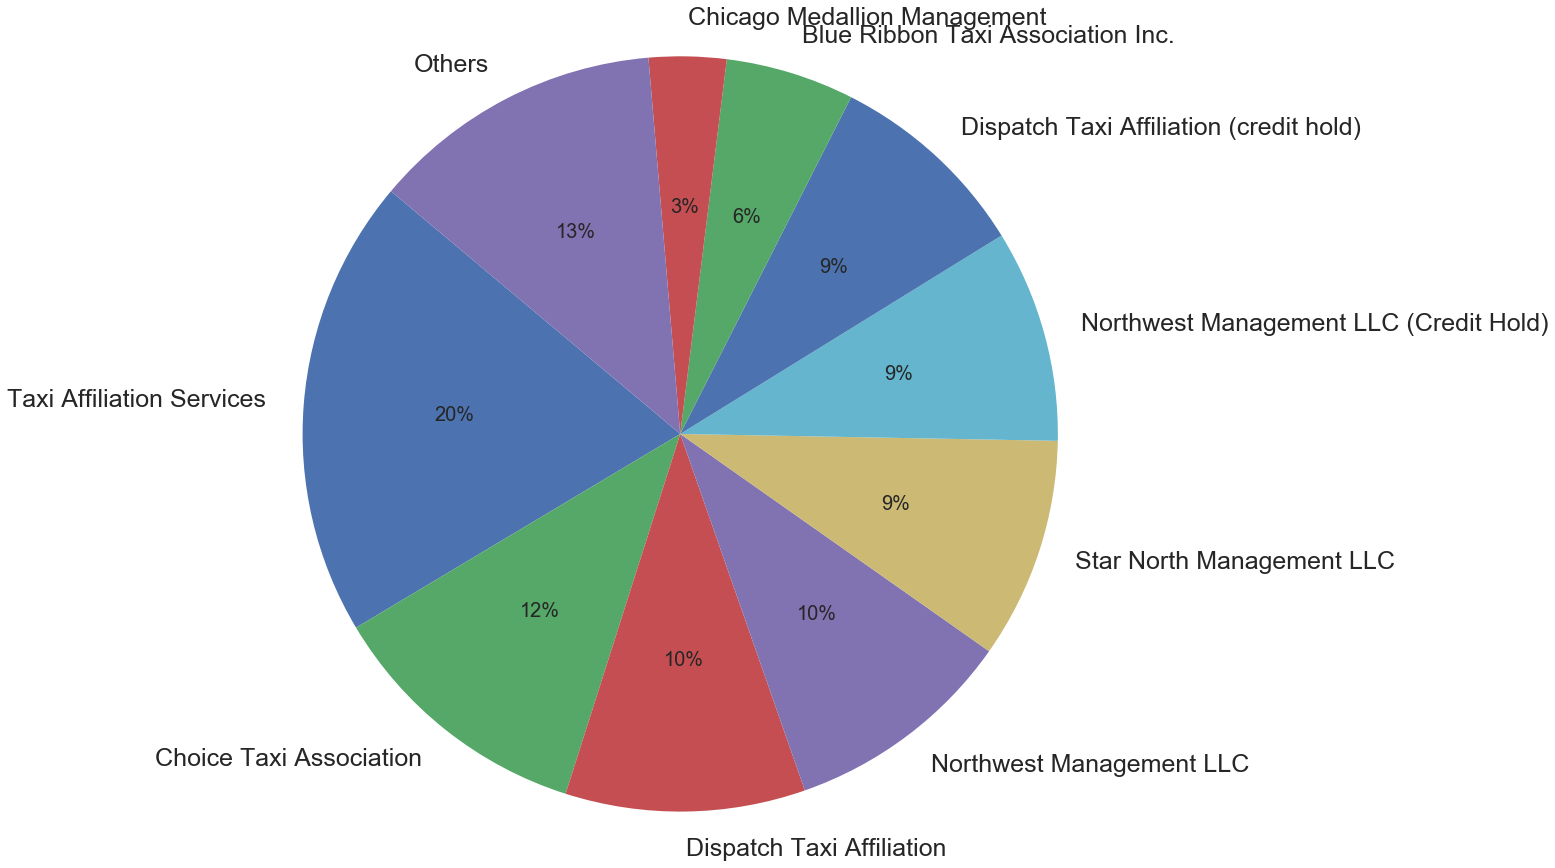

In [95]:
#Number of taxis owned by each company
query = '''
SELECT company, 
       Count(DISTINCT taxi_id) AS No_Of_Taxis 
FROM   c_taxi 
GROUP  BY company 
ORDER  BY no_of_taxis DESC; 
'''
taxiComp = getRes(query)
trimTaxiComp = taxiComp.iloc[:9,:]
trimTaxiComp.loc[len(trimTaxiComp),:] = ["Others",taxiComp.iloc[9:,1].sum()]
fig = plt.figure(figsize=(15,15))
plt.pie(trimTaxiComp["No_Of_Taxis"], labels=trimTaxiComp["company"],
        autopct='%1.0f%%', shadow=False, startangle=140 )
#plt.legend(trimTaxiComp["No_Of_Taxis"], trimTaxiComp["Company"], loc="best")
#autopct='%1.1f%%'
plt.axis('equal')
plt.rcParams['font.size'] = 20
plt.show()

# Payment distribution for taxi trips in Chicago

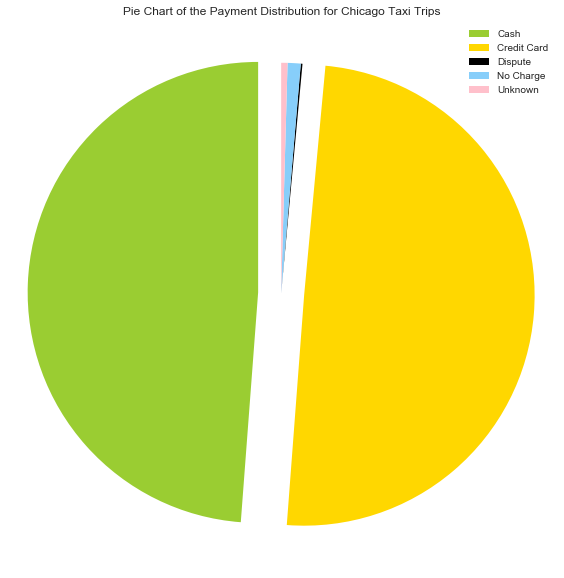

In [23]:

paymentType_sql ='''
SELECT 
    COUNT(1) AS 'Count', Payment_Type
FROM
    c_taxi
GROUP BY 
Payment_Type;
'''
paymenttype_Df = getRes(paymentType_sql)
labels = paymenttype_Df['Payment_Type']
sizes = paymenttype_Df['Count']
colors = ['yellowgreen', 'gold', 'black', 'lightskyblue','pink']
explode = (0.1, 0.1 , 0, 0 , 0) 
fig = plt.figure(figsize=(8,8))
patches, texts = plt.pie(sizes, explode = explode , colors=colors, startangle=90 )
plt.legend(patches, labels)
plt.axis('equal')
plt.tight_layout()
plt.title('Pie Chart of the Payment Distribution for Chicago Taxi Trips')
plt.show()

# Market share of Taxi company in Chicago

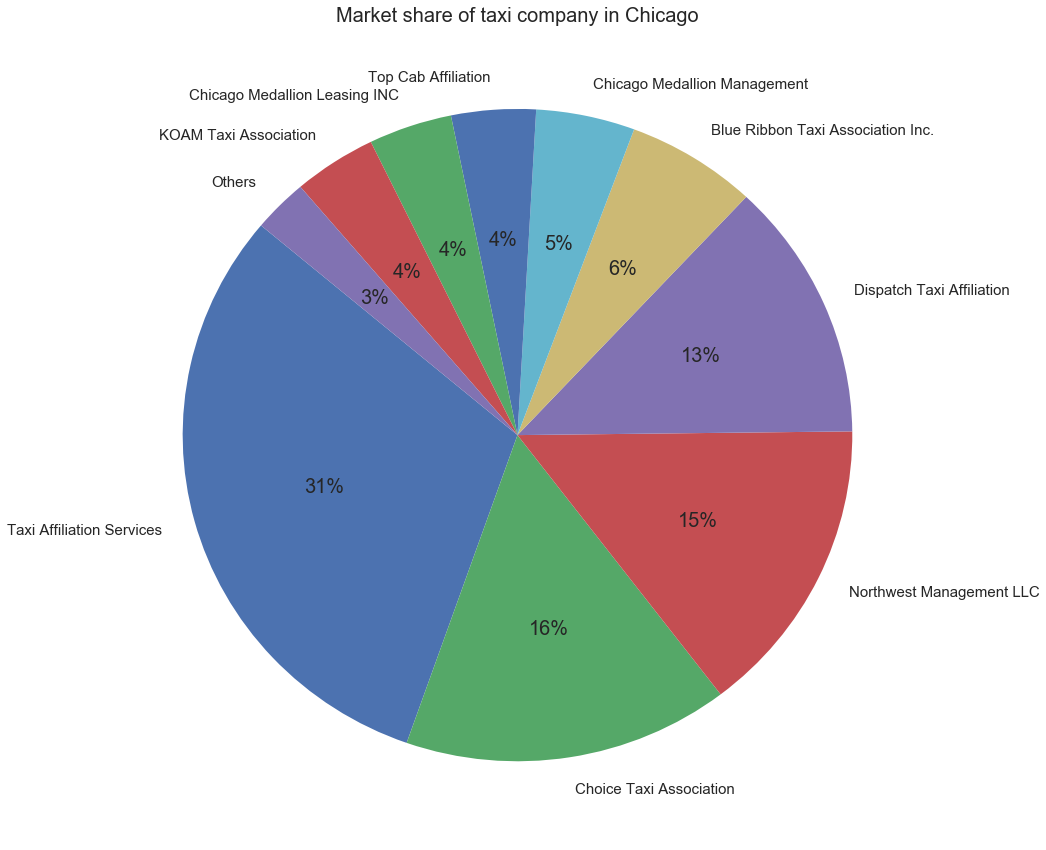

In [106]:
#Company Market share by revenue
query='''
SELECT company, 
       Sum(trip_total) Revenue, 
       Count(1)        AS Number_Of_Trips 
FROM   c_taxi 
GROUP  BY company 
ORDER  BY revenue DESC; 
'''
compRev = getRes(query)

trimCompRev = compRev.iloc[:9,:]
trimCompRev.loc[len(trimCompRev),:] = ["Others",compRev.iloc[10:,1].sum(),compRev.iloc[10:,2].sum()]
fig = plt.figure(figsize=(15,15))
plt.pie(trimCompRev["Revenue"], labels=trimCompRev["company"],
        autopct='%1.0f%%', shadow=False, startangle=140 )
#plt.legend(trimTaxiComp["No_Of_Taxis"], trimTaxiComp["Company"], loc="best")
#autopct='%1.1f%%'
#plt.axis('equal')
plt.title("Market share of taxi company in Chicago",fontsize = 20)
plt.rcParams['font.size'] = 20
plt.show()

# Top 15 companies to recieve highest tips

In [25]:
tips = getRes("select * from (select Company,avg(Tips) as Average_Tips_Made, count(1) as Trips from c_taxi group by Company) tip where Trips >100 order by Average_Tips_Made desc limit 15;")
tips

,Company,Average_Tips_Made,Trips
0,4053 - 40193 Adwar H. Nikola,4.353342,371
1,3669 - 85800 Jordan Taxi Inc,3.985577,104
2,2823 - 73307 Lee Express Inc,3.895860,413
3,Chicago Independents,3.271834,1167
4,4623 - 27290 Jay Kim,2.755117,811
5,3620 - 52292 David K. Cab Corp.,2.584402,527
6,5874 - 73628 Sergey Cab Corp.,2.545724,753
7,2809 - 95474 C & D Cab Co Inc.,2.520928,1002
8,2733 - 74600 Benny Jona,2.466920,948
9,2192 - 73487 Zeymane Corp,2.445116,731


# Fare vs Trip Miles of Top 5 taxi companies

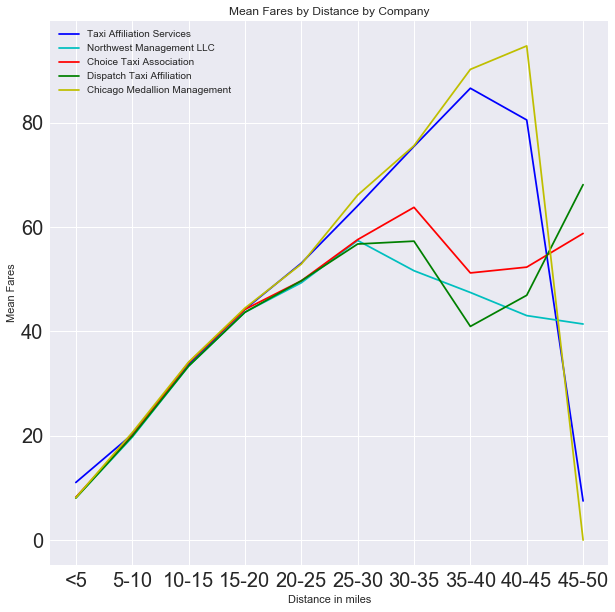

In [26]:
#fares vs distances
all_companies = getRes('select Company from c_taxi')
top5 = all_companies['Company'].value_counts().index.tolist()[:5]
mean_fares = [[] for i in range(5)]

for i in range(5):
	dists = [0,5,10,15,20,25,30,35,40,45,50]
	x = "'" + top5[i] + "'"
	for z in range(0,10):
		q = getRes("select Fare from c_taxi where Trip_Miles between "+str(dists[z])+" and "+str(dists[z+1])+" and Company = "+x+";")
		if len(q) != 0:
			mean_fares[i].append(sum(q['Fare'])/len(q))
		else:
			mean_fares[i].append(0)	

x = np.array([0,1,2,3,4,5,6,7,8,9])
times = ['<5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50']
plt.figure(figsize=(10,10))
plt.xticks(x, times)
plt.plot(x,mean_fares[0],label = top5[0],color = 'b')
plt.plot(x,mean_fares[1],label = top5[1],color = 'c')
plt.plot(x,mean_fares[2],label = top5[2],color = 'r')
plt.plot(x,mean_fares[3],label = top5[3],color = 'g')
plt.plot(x,mean_fares[4],label = top5[4],color = 'y')
plt.xlabel('Distance in miles')
plt.ylabel('Mean Fares')
plt.title('Mean Fares by Distance by Company')
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.legend()
plt.show()

# Fare Rate vs Trip Miles of Top 5 taxi companies

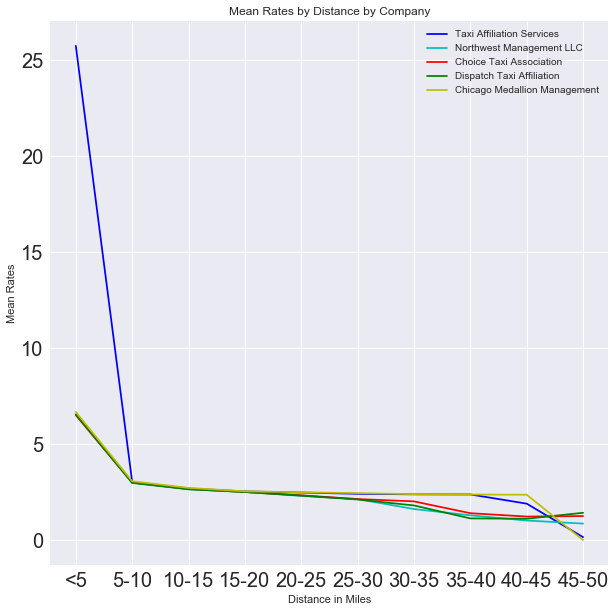

In [27]:
#mean rates for distance

mean_rates = [[] for i in range(5)]

for i in range(5):
	dists = [0,5,10,15,20,25,30,35,40,45,50]
	x = "'" + top5[i] + "'"
	for z in range(0,10):
		q = getRes("select Fare/Trip_Miles from c_taxi where Trip_Miles between "+str(dists[z])+" and "+str(dists[z+1])+" and Company = "+x+";")
		if len(q) != 0:
			avg = sum(q['Fare/Trip_Miles'])/len(q)
			mean_rates[i].append(avg)
		else:
			mean_rates[i].append(0)

x = np.array([0,1,2,3,4,5,6,7,8,9])
times = ['<5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50']
plt.figure(figsize=(10,10))
plt.xticks(x, times)
plt.plot(x,mean_rates[0],label = top5[0],color = 'b')
plt.plot(x,mean_rates[1],label = top5[1],color = 'c')
plt.plot(x,mean_rates[2],label = top5[2],color = 'r')
plt.plot(x,mean_rates[3],label = top5[3],color = 'g')
plt.plot(x,mean_rates[4],label = top5[4],color = 'y')
plt.xlabel('Distance in Miles')
plt.ylabel('Mean Rates')
plt.title('Mean Rates by Distance by Company')
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.legend()			
plt.show()

# Fare vs Trip Duration of Top 5 taxi companies

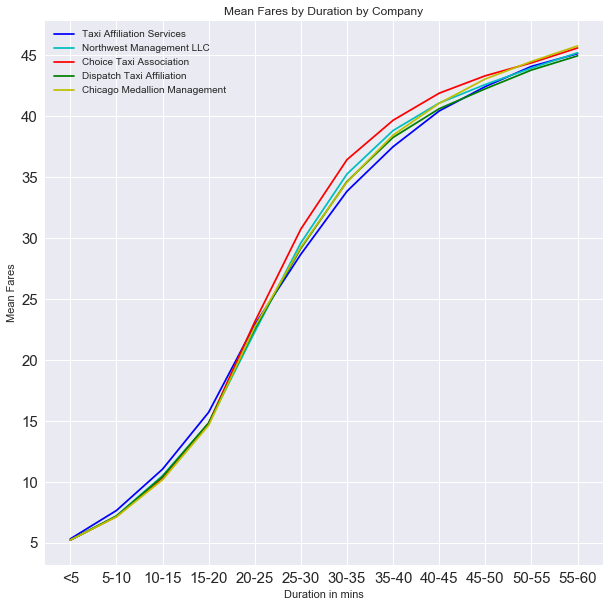

In [104]:
mean_fares = [[] for i in range(5)]

for i in range(5):
	times = [300,600,900,1200,1500,1800,2100,2400,2700,3000,3300,3600]
	x = "'" + top5[i] + "'"
	q = getRes("select Fare from c_taxi where Trip_Seconds <= 300 and Company = " + x +";")
	mean_fares[i].append(sum(q['Fare'])/len(q))



	for z in range(0,11):
		q = getRes("select Fare from c_taxi where Trip_Seconds between "+str(times[z])+" and "+str(times[z+1])+" and Company = "+x+";")
		mean_fares[i].append(sum(q['Fare'])/len(q))

x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
times = ['<5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60']
plt.figure(figsize=(10,10))
plt.xticks(x, times)
plt.plot(x,mean_fares[0],label = top5[0],color = 'b')
plt.plot(x,mean_fares[1],label = top5[1],color = 'c')
plt.plot(x,mean_fares[2],label = top5[2],color = 'r')
plt.plot(x,mean_fares[3],label = top5[3],color = 'g')
plt.plot(x,mean_fares[4],label = top5[4],color = 'y')
plt.xlabel('Duration in mins')
plt.ylabel('Mean Fares')
plt.title('Mean Fares by Duration by Company')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.legend()
plt.show()

# Fare Rate vs Trip Duration of Top 5 taxi companies

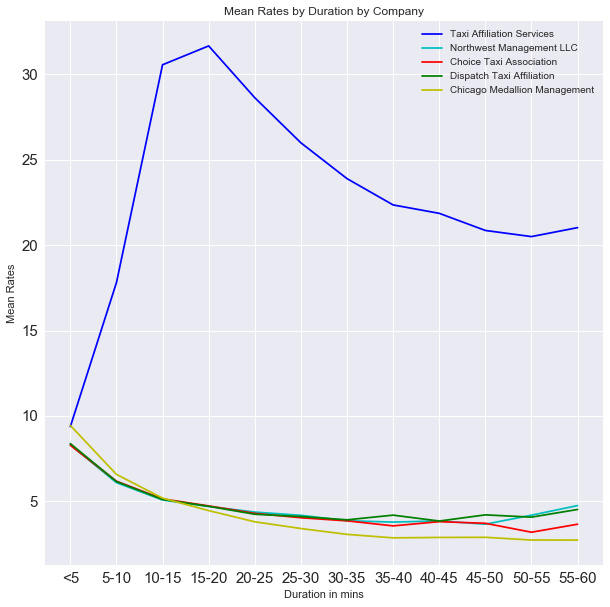

In [105]:
mean_fares = [[] for i in range(5)]

for i in range(5):
	times = [300,600,900,1200,1500,1800,2100,2400,2700,3000,3300,3600]
	x = "'" + top5[i] + "'"
	q = getRes("select Fare/Trip_Miles from c_taxi where Trip_Seconds <= 300 and Company = " + x +";")
	avg = sum(q['Fare/Trip_Miles'])/len(q)
	mean_fares[i].append(avg)

	for z in range(0,11):
		q = getRes("select Fare/Trip_Miles from c_taxi where Trip_Seconds between "+str(times[z])+" and "+str(times[z+1])+" and Company = "+x+";")
		avg = sum(q['Fare/Trip_Miles'])/len(q)
		mean_fares[i].append(avg)
        
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
times = ['<5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60']
plt.figure(figsize=(10,10))
plt.xticks(x, times)
plt.plot(x,mean_fares[0],label = top5[0],color = 'b')
plt.plot(x,mean_fares[1],label = top5[1],color = 'c')
plt.plot(x,mean_fares[2],label = top5[2],color = 'r')
plt.plot(x,mean_fares[3],label = top5[3],color = 'g')
plt.plot(x,mean_fares[4],label = top5[4],color = 'y')
plt.xlabel('Duration in mins')
plt.ylabel('Mean Rates')
plt.title('Mean Rates by Duration by Company')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.legend()
plt.show()

In [30]:
#Average Fare_Rate per company
query = '''
SELECT * 
FROM   (SELECT company, 
               Avg(fare / trip_miles)            AS Fare_Rate, 
               Avg(( fare / trip_seconds ) * 60) AS Fare_Minute, 
               Avg(trip_miles)                   AS Avg_Trip_Miles, 
               Count(1)                          AS No_Of_Trips 
        FROM   c_taxi 
        GROUP  BY company) cr 
WHERE  no_of_trips > 100 
ORDER  BY fare_rate DESC
limit 10; 
'''
frCompHigh = getRes(query)
query = '''
SELECT * 
FROM   (SELECT company, 
               Avg(fare / trip_miles)            AS Fare_Rate, 
               Avg(( fare / trip_seconds ) * 60) AS Fare_Minute, 
               Avg(trip_miles)                   AS Avg_Trip_Miles, 
               Count(1)                          AS No_Of_Trips 
        FROM   c_taxi 
        GROUP  BY company) cr 
WHERE  no_of_trips > 100 
ORDER  BY fare_rate 
limit 10; 
'''
frCompLow = getRes(query)

# Top 10 expensive fare taxi companies

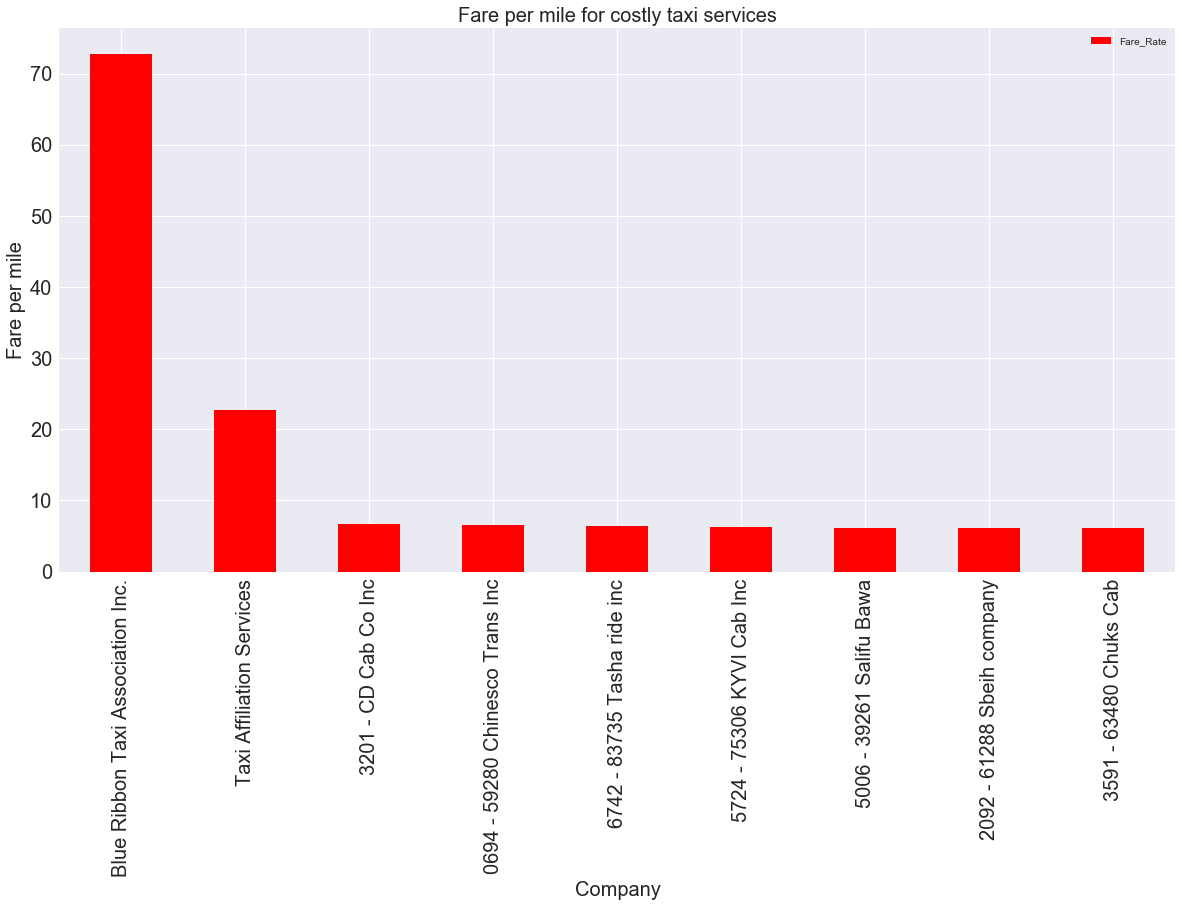

In [31]:
fig = plt.figure(figsize=(20,8))
frCompHigh[:9].plot(x= "company",y = "Fare_Rate",kind='Bar',color = 'Red' ,figsize=(20,10))
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Company',fontsize = 20)
plt.ylabel('Fare per mile',fontsize = 20)
plt.title('Fare per mile for costly taxi services',fontsize = 20)
plt.show()

# Top 10 cheapest fare taxi companies

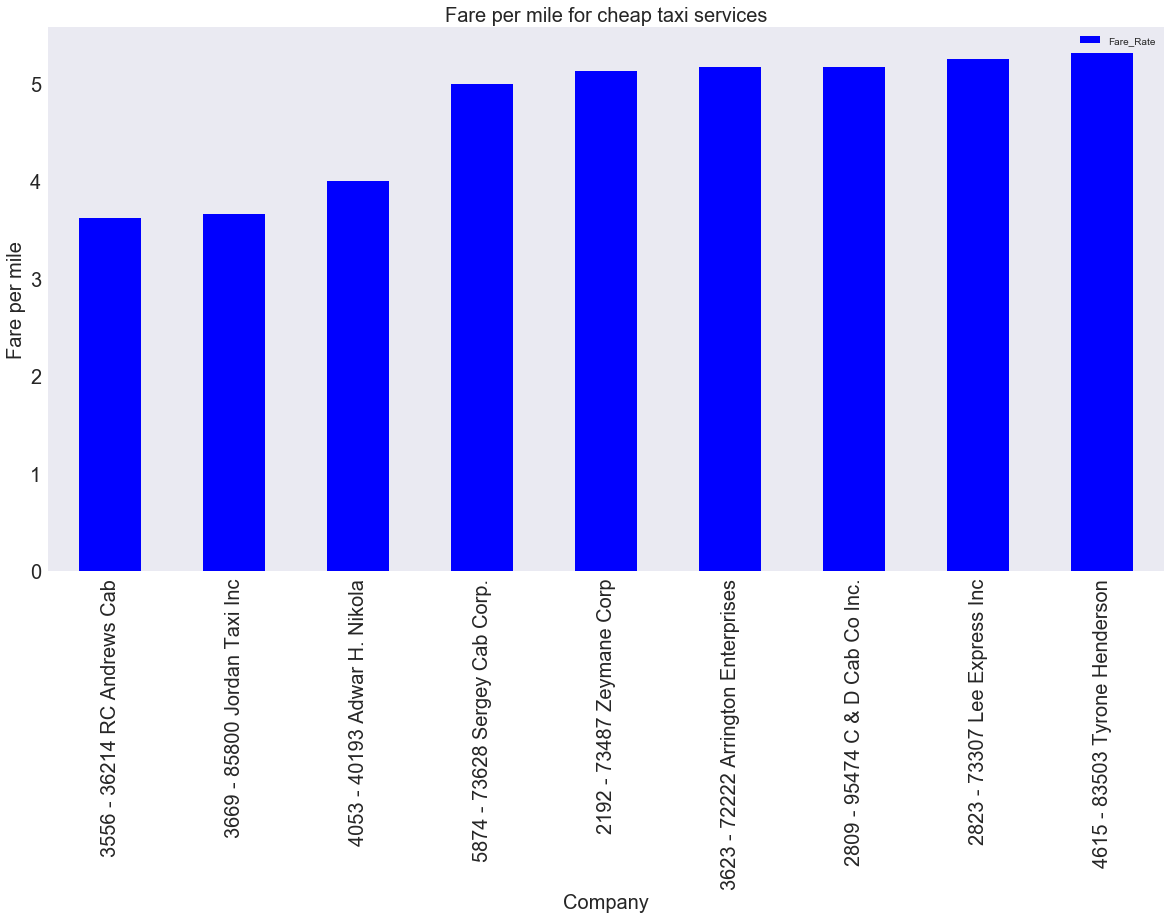

In [32]:
frCompLow[:9].plot(x= "company",y = "Fare_Rate",secondary_y= "Avg_Trip_Miles",kind='Bar',color = 'Blue',figsize=(20,10))
plt.xlabel('Company',fontsize = 20)
plt.ylabel('Fare per mile',fontsize = 20)
plt.title('Fare per mile for cheap taxi services',fontsize = 20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.show()

# Top 5 Community area with highest fare rate

In [33]:
#Average Fare_Rate by community Area top 5
query = '''
SELECT dt.*, 
       pl.* ,
       comm.*
FROM   (SELECT * 
        FROM   (SELECT pickup_community_area, 
                       Avg(fare / trip_miles)            AS Fare_Rate, 
                       Avg(( fare / trip_seconds ) * 60) AS Fare_Minute, 
                       Count(1)                          AS No_Of_Trips 
                FROM   c_taxi 
                GROUP  BY pickup_community_area) cr 
        WHERE  no_of_trips > 100) dt 
       JOIN (SELECT * 
             FROM   pickup_location) pl 
         ON ( pl.pickup_community_area = dt.pickup_community_area )
         join (select * from community) comm
         on(comm.community_area = pl.pickup_community_area)
ORDER  BY fare_rate DESC;  
'''
commRate = getRes(query)
commRateHead = commRate.head()
m = folium.Map(location = [41.881832, -87.623177], zoom_start = 10)
for dt in range(len(commRateHead)):
    tempdt = commRateHead.iloc[dt]
    markerCol = col[dt]
    dispStr = str(tempdt["Community_Name"]) + " $" + str(round(tempdt["Fare_Rate"], 2))
    folium.Marker(
        location = [tempdt["Avg_P_Lat"], tempdt["Avg_P_Long"]],
        popup = dispStr,
        icon = folium.Icon(color = markerCol)
    ).add_to(m)
m

# Frequency of trips by pickup and dropoff community

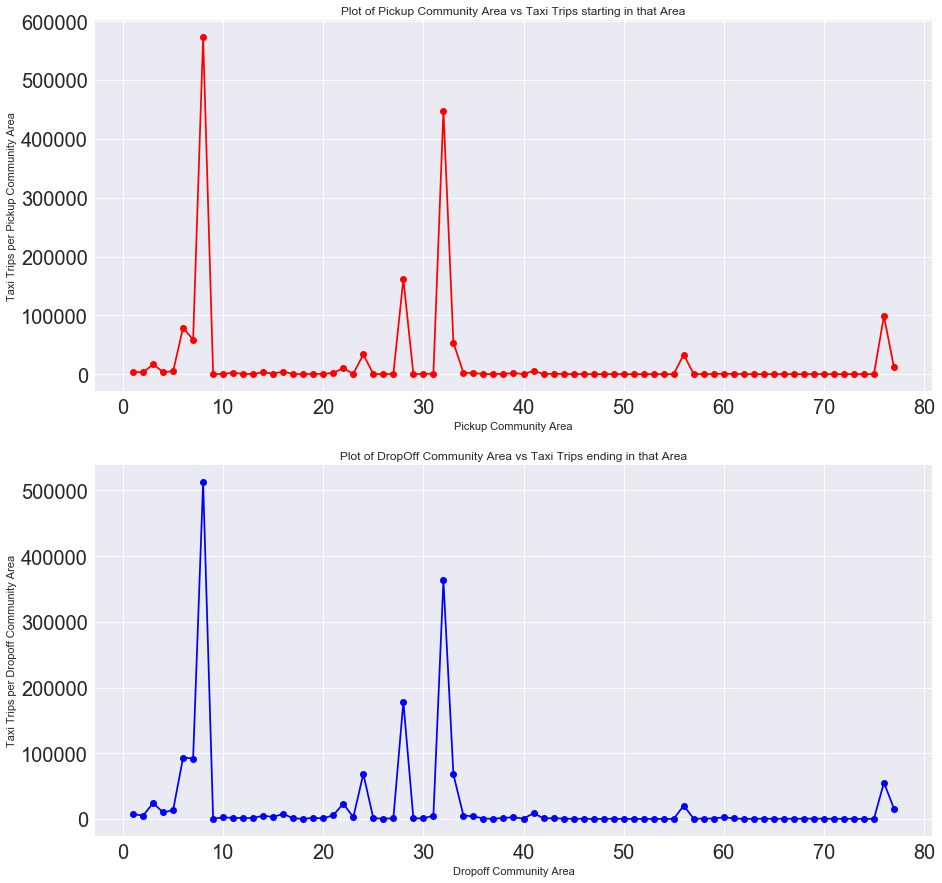

In [35]:
#pickup community area 
query_pickup = '''
SELECT 
    COUNT(*) AS 'Taxi_Trips_per_Pickup_Community_Area',
    Pickup_Community_Area
FROM
    c_taxi
GROUP BY Pickup_Community_Area;
'''
pickupDF = getRes(query_pickup)

#dropoff community area 
query_dropoff = '''
SELECT 
    COUNT(*) AS 'Taxi_Trips_per_Dropoff_Community_Area',
    Dropoff_Community_Area
FROM
    c_taxi
GROUP BY Dropoff_Community_Area
'''
dropoffDF = getRes(query_dropoff)

fig = plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
plt.plot(pickupDF['Pickup_Community_Area'],pickupDF['Taxi_Trips_per_Pickup_Community_Area'],'-ok', color='Red')
plt.xlabel('Pickup Community Area')
plt.ylabel('Taxi Trips per Pickup Community Area')
plt.title('Plot of Pickup Community Area vs Taxi Trips starting in that Area')

plt.subplot(2, 1, 2)
plt.plot(dropoffDF['Dropoff_Community_Area'],dropoffDF['Taxi_Trips_per_Dropoff_Community_Area'],'-ok', color='blue')
plt.xlabel('Dropoff Community Area')
plt.ylabel('Taxi Trips per Dropoff Community Area')
plt.title('Plot of DropOff Community Area vs Taxi Trips ending in that Area')

plt.show()

# Dominance of taxi company in each community area

In [36]:
query = '''
SELECT m.pickup_community_area, 
       n.company, 
       m.max_trips, 
       comm.community_Name,
       pl.*
FROM   ( (SELECT pickup_community_area, 
               Max(no_of_trips) AS Max_Trips 
        FROM   (SELECT pickup_community_area, 
                       company, 
                       Count(1) AS No_Of_Trips 
                FROM   c_taxi 
                WHERE  company != 'Unknown' 
                GROUP  BY pickup_community_area, 
                          company 
                ORDER  BY pickup_community_area, 
                          no_of_trips DESC) a 
        GROUP  BY pickup_community_area) m 
         JOIN (SELECT pickup_community_area, 
                      company, 
                      Count(1) AS No_Of_Trips 
               FROM   c_taxi 
               WHERE  company != 'Unknown' 
               GROUP  BY pickup_community_area, 
                         company) n 
           ON ( m.pickup_community_area = n.pickup_community_area 
                AND m.max_trips = n.no_of_trips )) 
join (select * from community) comm
         on(comm.community_area = m.pickup_community_area)
         join (select * from pickup_location) pl
on (pl.pickup_community_area = m.pickup_community_area)
'''
dom = getRes(query)
m = folium.Map(location = [41.881832, -87.623177], zoom_start = 10)
taxiComp = ["Taxi Affiliation Services","Dispatch Taxi Affiliation","Northwest Management LLC"]
taxiCol = ["blue","Red","green"]
for dt in range(len(dom)):
    tempdt = dom.iloc[dt]
    #markerCol = col[dt]
    dispStr = str(tempdt["Community_Name"]) +str("| ") + tempdt["company"]
    if(tempdt["company"] == taxiComp[0]):
        markerCol = taxiCol[0]
    elif(tempdt["company"] == taxiComp[1]):
        markerCol = taxiCol[1]
    elif(tempdt["company"] == taxiComp[2]):
        markerCol = taxiCol[2]
    else:
        markerCol = "purple"
    
    folium.Marker(
        location = [tempdt["Avg_P_Lat"], tempdt["Avg_P_Long"]],
        popup = dispStr,
        icon = folium.Icon(color = markerCol)
    ).add_to(m)
m

In [37]:
def getTaxiFlow(data,colList = col):
    m = folium.Map(location=[41.881832,-87.623177],zoom_start=10)
    attr = {'fill': '#007DEF', 'font-weight': 'bold', 'font-size': '24'}

    #col = ["#00ffff","#00e5e5","#00cccc","#00b2b2","#009999",]
    #col = ["#FF0000","#FF6600","#FFEE00","#99FF00","#00FF00"]
    for dt in range(len(data)):
        tempdt = data.iloc[dt]
        #tempdt = dt
        #print(tempdt)
        latLong = np.array(tempdt)[3:7]
        latLong = np.array(latLong.reshape((2,2)),dtype=list)
        #print(latLong)
        #folium.PolyLine([[42.0095, -87.6702],
        # [42.0015, -87.6949]]
        #).add_to(m)
        latLongdata = [[latLong[0][0], latLong[0][1]],
         [latLong[1][0], latLong[1][1]]]
        folium.PolyLine(latLongdata,color = colList[dt]
        ).add_to(m)
        #pickup
        folium.Marker(
        location = [latLong[0][0], latLong[0][1]],
        popup = tempdt["Pickup_Com"],
        icon = folium.Icon(color = "red")
        ).add_to(m)
        #Dropoff
        folium.Marker(
        location = [latLong[1][0], latLong[1][1]],
        popup = tempdt["Dropoff_Com"],
        icon = folium.Icon(color = "green")
        ).add_to(m)

        #folium.RegularPolygonMarker(location=(latLong[1][0], latLong[1][1]), fill_color='black', number_of_sides=10, radius=5).add_to(m)
        #folium.RegularPolygonMarker(location=(latLong[0][0], latLong[0][1]), fill_color='white', number_of_sides=10, radius=5).add_to(m)
    return m

# Top 10 Busiest route

The red marker denotes the pickup community area location, green marker denotes dropoff comunity area location

Order : 
1. Black
2. Blue
3. Purple
4. Red
5. Orange
6. Yellow
7. Green
8. Violet
9. Dark Green
10. Maroon

In [38]:
#Busiest route
query = '''
select  dt.*,pl.Avg_P_Lat as Plat,pl.Avg_P_Long as Plong,dl.Avg_D_Lat as Dlat,dl.Avg_D_Long as Dlong,
pcom.community_name as Pickup_Com, dcom.community_name as Dropoff_Com
from 
(SELECT pickup_community_area, 
       dropoff_community_area, 
       Count(1) AS No_Of_Trips 
FROM   c_taxi 
WHERE  pickup_community_area != dropoff_community_area
GROUP  BY pickup_community_area, 
          dropoff_community_area 
          ORDER  BY no_of_trips DESC
limit 10) dt
join (select * from pickup_location) pl
on (pl.pickup_community_area = dt.pickup_community_area)
join (select * from dropoff_location) dl
on (dl.dropoff_community_area = dt.dropoff_community_area)
join (select * from community) pcom
on(pcom.community_area = pl.pickup_community_area)
join (select * from community) dcom
on(dcom.community_area = dl.dropoff_community_area)
ORDER  BY no_of_trips DESC;
'''
brTotal = getRes(query)
colorHex = ["black","blue","purple","red","orange","yellow","green","violet","#33cc33","#7b0b23"]
getTaxiFlow(brTotal,colList= colorHex)

In [39]:
#Busiest route by time slot
mornQ = '''
select  dt.*,pl.Avg_P_Lat as Plat,pl.Avg_P_Long as Plong,dl.Avg_D_Lat as Dlat,dl.Avg_D_Long as Dlong,
pcom.community_name as Pickup_Com, dcom.community_name as Dropoff_Com
from 
(SELECT pickup_community_area, 
       dropoff_community_area, 
       Count(1) AS No_Of_Trips 
FROM   c_taxi 
WHERE  pickup_community_area != dropoff_community_area
AND Hour(trip_start_timestamp) BETWEEN 07 AND 11 
AND pickup_community_area not in (8,32)
AND dropoff_community_area not in (8,32)
GROUP  BY pickup_community_area, 
          dropoff_community_area 
          ORDER  BY no_of_trips DESC
limit 5) dt
join (select * from pickup_location) pl
on (pl.pickup_community_area = dt.pickup_community_area)
join (select * from dropoff_location) dl
on (dl.dropoff_community_area = dt.dropoff_community_area)
join (select * from community) pcom
on(pcom.community_area = pl.pickup_community_area)
join (select * from community) dcom
on(dcom.community_area = dl.dropoff_community_area)
ORDER  BY no_of_trips DESC;
'''

aftQ = '''
select  dt.*,pl.Avg_P_Lat as Plat,pl.Avg_P_Long as Plong,dl.Avg_D_Lat as Dlat,dl.Avg_D_Long as Dlong,
pcom.community_name as Pickup_Com, dcom.community_name as Dropoff_Com
from 
(SELECT pickup_community_area, 
       dropoff_community_area, 
       Count(1) AS No_Of_Trips 
FROM   c_taxi 
WHERE  pickup_community_area != dropoff_community_area
AND Hour(trip_start_timestamp) BETWEEN 11 AND 15
AND pickup_community_area not in (8,32)
AND dropoff_community_area not in (8,32)
GROUP  BY pickup_community_area, 
          dropoff_community_area 
          ORDER  BY no_of_trips DESC
limit 5) dt
join (select * from pickup_location) pl
on (pl.pickup_community_area = dt.pickup_community_area)
join (select * from dropoff_location) dl
on (dl.dropoff_community_area = dt.dropoff_community_area)
join (select * from community) pcom
on(pcom.community_area = pl.pickup_community_area)
join (select * from community) dcom
on(dcom.community_area = dl.dropoff_community_area)
ORDER  BY no_of_trips DESC;

'''
eveQ = '''
select  dt.*,pl.Avg_P_Lat as Plat,pl.Avg_P_Long as Plong,dl.Avg_D_Lat as Dlat,dl.Avg_D_Long as Dlong,
pcom.community_name as Pickup_Com, dcom.community_name as Dropoff_Com
from 
(SELECT pickup_community_area, 
       dropoff_community_area, 
       Count(1) AS No_Of_Trips 
FROM   c_taxi 
WHERE  pickup_community_area != dropoff_community_area
AND Hour(trip_start_timestamp) BETWEEN 15 AND 19
AND pickup_community_area not in (8,32)
AND dropoff_community_area not in (8,32)
GROUP  BY pickup_community_area, 
          dropoff_community_area 
          ORDER  BY no_of_trips DESC
limit 5) dt
join (select * from pickup_location) pl
on (pl.pickup_community_area = dt.pickup_community_area)
join (select * from dropoff_location) dl
on (dl.dropoff_community_area = dt.dropoff_community_area)
join (select * from community) pcom
on(pcom.community_area = pl.pickup_community_area)
join (select * from community) dcom
on(dcom.community_area = dl.dropoff_community_area)
ORDER  BY no_of_trips DESC;

'''

niteQ = '''
select  dt.*,pl.Avg_P_Lat as Plat,pl.Avg_P_Long as Plong,dl.Avg_D_Lat as Dlat,dl.Avg_D_Long as Dlong,
pcom.community_name as Pickup_Com, dcom.community_name as Dropoff_Com
from 
(SELECT pickup_community_area, 
       dropoff_community_area, 
       Count(1) AS No_Of_Trips 
FROM   c_taxi 
WHERE  pickup_community_area != dropoff_community_area
AND Hour(trip_start_timestamp) BETWEEN 19 AND 24
AND pickup_community_area not in (8,32)
AND dropoff_community_area not in (8,32)
GROUP  BY pickup_community_area, 
          dropoff_community_area 
          ORDER  BY no_of_trips DESC
limit 5) dt
join (select * from pickup_location) pl
on (pl.pickup_community_area = dt.pickup_community_area)
join (select * from dropoff_location) dl
on (dl.dropoff_community_area = dt.dropoff_community_area)
join (select * from community) pcom
on(pcom.community_area = pl.pickup_community_area)
join (select * from community) dcom
on(dcom.community_area = dl.dropoff_community_area)
ORDER  BY no_of_trips DESC;
'''
lateNiteQ= '''
select  dt.*,pl.Avg_P_Lat as Plat,pl.Avg_P_Long as Plong,dl.Avg_D_Lat as Dlat,dl.Avg_D_Long as Dlong,
pcom.community_name as Pickup_Com, dcom.community_name as Dropoff_Com
from 
(SELECT pickup_community_area, 
       dropoff_community_area, 
       Count(1) AS No_Of_Trips 
FROM   c_taxi 
WHERE  pickup_community_area != dropoff_community_area
AND Hour(trip_start_timestamp) BETWEEN 00 AND 07
AND pickup_community_area not in (8,32)
AND dropoff_community_area not in (8,32)
GROUP  BY pickup_community_area, 
          dropoff_community_area 
          ORDER  BY no_of_trips DESC
limit 5) dt
join (select * from pickup_location) pl
on (pl.pickup_community_area = dt.pickup_community_area)
join (select * from dropoff_location) dl
on (dl.dropoff_community_area = dt.dropoff_community_area)
join (select * from community) pcom
on(pcom.community_area = pl.pickup_community_area)
join (select * from community) dcom
on(dcom.community_area = dl.dropoff_community_area)
ORDER  BY no_of_trips DESC;'''

mor = getRes(mornQ);
aft = getRes(aftQ);
eve = getRes(eveQ);
nite = getRes(niteQ);
lnite = getRes(lateNiteQ);

# Top busiest taxi routes

The red marker denotes the pickup community area location, green marker denotes dropoff comunity area location

Order : 
1. Black 
2. Red
3. Purple
4. Blue
5. Green

| Time of day | Timings |
| :----- | :----|
| Morning | 7 AM - 11 AM |
| Afternoon | 11 AM - 3 PM |
| Evening | 3 PM - 7 PM |
| Night | 7 PM - 12 AM |
| Late Night | 12 AM - 7 AM |

# Top 5 busiest taxi routes in Morning

In [40]:
getTaxiFlow(mor)

# Top 5 busiest taxi routes in Afternoon

In [41]:
getTaxiFlow(aft)

# Top 5 busiest taxi routes in Evening

In [42]:
getTaxiFlow(eve)

# Top 5 busiest taxi routes in Night

In [110]:
getTaxiFlow(nite)

# Top 5 busiest taxi routes late night

In [44]:
getTaxiFlow(lnite)

# Building linear model

In [45]:
q_lm = '''
SELECT 
    Fare, Trip_Seconds, Trip_Miles
FROM
    c_taxi;
'''
lm_DF = getRes(q_lm)
lm_Input = lm_DF.iloc[:,1:3] 
regr = LinearRegression()
regr.fit(lm_Input,lm_DF['Fare'])
print("The Equation is :\n Fare = ",regr.intercept_ ,"+" , regr.coef_[0],"*",lm_Input.columns[0],"+",regr.coef_[1],"*",lm_Input.columns[1])

model = smf.ols(formula='Fare ~ Trip_Seconds + Trip_Miles', data=lm_DF)
results_formula = model.fit()
print(results_formula.params)



The Equation is :
 Fare =  1.75587809794 + 0.00999548747153 * Trip_Seconds + 1.03674813141 * Trip_Miles
Intercept       1.755878
Trip_Seconds    0.009995
Trip_Miles      1.036748
dtype: float64


# Fare Calculator

In [115]:
miles = eval(input("Enter trip miles : "))
duration = eval(input("Enter trip duration in minutes : "))
duration = duration*60
round(regr.predict(X= [duration,miles])[0],2)

Enter trip miles : 10
Enter trip duration in minutes : 20


24.120000000000001

# 3-D Plotting of Trip Miles vs Trip Seconds vs Fare

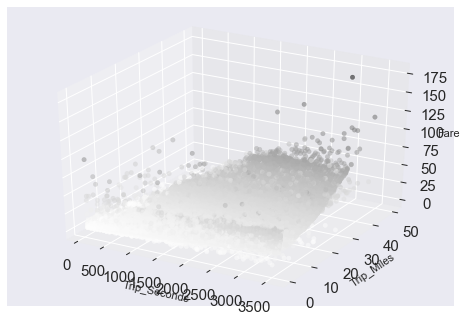

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lm_DF['Trip_Seconds'],lm_DF['Trip_Miles'],lm_DF['Fare'],c=lm_DF['Fare'], marker='o', alpha=0.5)
ax.set_xlabel('Trip_Seconds')
ax.set_ylabel('Trip_Miles')
ax.set_zlabel('Fare')
plt.show()

# Future scope
- Building a fare pricing model that considers the company, start time of the trip.
- Integration with Google APIs to fetch duration of the trip, tolls, average speed added as predictors to the fare model.